In [9]:
from osgeo import gdal
import numpy as np
import os
#import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../Functions')
import TiffTools as tt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
inlist = []
directory = '/Volumes/Extreme Pro/Data/Sept2007USGSEarthExplorer/'
for folder in os.listdir(directory):
    if folder.startswith('CA'):
        print(folder)
        for file in os.listdir(f'{directory+folder}/2007/200709_monterey-san_benito_county_ca_1ft_sp_clr/'):
            if file.startswith('vol'):
                path = directory+folder+'/2007/200709_monterey-san_benito_county_ca_1ft_sp_clr/'+file+'/'
                inlist.append(path+os.listdir(path)[1])


CA 2
CA 3
CA 4
CA 5
CA 6
CA 7
CA 10
CA 16
CA 17
CA 20
CA 23
CA 24
CA 26
CA 28
CA 29
CA 31
CA 35
CA 36
CA 37
CA 38
CA 40


In [11]:
# Save all other files as one tif
l2022 = ['/Volumes/Extreme Pro/Data/NAIP/MRMR/2022_4BandImagery_California_J978344_001_001.tif',
        '/Volumes/Extreme Pro/Data/NAIP/MRMR/2022_4BandImagery_California_J978344_001_000.tif']
l2020 = ['/Volumes/Extreme Pro/Data/NAIP/MRMR/2020_4BandImagery_California_J979977_001_001.tif',
        '/Volumes/Extreme Pro/Data/NAIP/MRMR/2020_4BandImagery_California_J979977_001_000.tif']
l2018 = '/Volumes/Extreme Pro/Data/NAIP/MRMR/2018_4BandImagery_CA_J979978_000_000.tif' 
l2016 = ['/Volumes/Extreme Pro/Data/NAIP/2016_4Band/m_3612042_se_10_h_20160530.tif',
         '/Volumes/Extreme Pro/Data/NAIP/2016_4Band/m_3612042_sw_10_h_20160530.tif',
         '/Volumes/Extreme Pro/Data/NAIP/2016_4Band/m_3612050_nw_10_h_20160530.tif', 
         '/Volumes/Extreme Pro/Data/NAIP/2016_4Band/m_3612050_se_10_h_20160530.tif', 
         '/Volumes/Extreme Pro/Data/NAIP/2016_4Band/m_3612051_nw_10_h_20160530.tif',
         '/Volumes/Extreme Pro/Data/NAIP/2016_4Band/m_3612051_sw_10_h_20160530.tif']

In [12]:
dx = 1.2
dy = 0.5
print('-a_ullr',5998493.00+dx,1996869.50+dy,6058493.00+dx,1948869.5+dy)


-a_ullr 5998494.2 1996870.0 6058494.2 1948870.0


In [14]:
# Merge relevant files
outf = 'Sept2007USGSMosaic.tif'
inf = inlist

# Create Mosaic
gdal.Warp(outf,inf,xRes=0.6,yRes=-0.6,resampleAlg='cubic')

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f8f680f6810> >

In [ ]:
# NEXT CASS, YOU HAVE TO ALIGN THE TIF MANUALLY!!

In [9]:
# Merge relevant files
outf = 'Sept2007USGSMosaic.tif'
inf = inlist

# Create Mosaic
#gdal.Warp(outf,inf,xRes=0.6, yRes=-0.6)
# Create Greyscale image from Mosaic at 60 cm resolution cut to AOI
# -a_ullr 5998494.2 1996870.0 6058494.2 1948870.0
outf = 'Sept2007USGSMosaic-aligned.tif' # MANUALLY SHIFTED IN QGIS W/ GDAL_TRANSLATE TO MATCH NAIP IMAGES BETTER!
tt.micmacExport(outf,outname='Sept2007USGSMosaicCut60cm.tif',srs='EPSG:32610',interp='cubic',cutlineDSName='/Volumes/Extreme Pro/qgis/ClipMRMR.shp',
                outres=[0.6,-0.6])

Computing Gray from RGB values


: 

In [7]:
outf = 'June2016NAIPMosaic.tif'
inf = l2016

# Create Mosaic
gdal.Warp(outf,inf)
# Create Greyscale image from Mosaic at 60 cm resolution cut to AOI
tt.micmacExport(outf,outname=outf[:-4]+'Cut60cm.tif',srs='EPSG:32610',interp='cubic',cutlineDSName='/Volumes/Extreme Pro/qgis/ClipMRMR.shp',
                outres=[0.6,-0.6])



Computing Gray from RGB values


In [ ]:
outf = 'July2018NAIPMosaic.tif'
inf = l2018

# Create Mosaic
gdal.Warp(outf,inf)
# Create Greyscale image from Mosaic at 60 cm resolution cut to AOI
tt.micmacExport(outf,outname=outf[:-4]+'Cut60cm.tif',srs='EPSG:32610',interp='cubic',cutlineDSName='/Volumes/Extreme Pro/qgis/ClipMRMR.shp',
                outres=[0.6,-0.6])


In [ ]:
outf = 'June2020NAIPMosaic.tif'
inf = l2020

# Create Mosaic
gdal.Warp(outf,inf)
# Create Greyscale image from Mosaic at 60 cm resolution cut to AOI
tt.micmacExport(outf,outname=outf[:-4]+'Cut60cm.tif',srs='EPSG:32610',interp='cubic',cutlineDSName='/Volumes/Extreme Pro/qgis/ClipMRMR.shp',
                outres=[0.6,-0.6])


In [ ]:
outf = 'June2022NAIPMosaic.tif'
inf = l2022
# Create Mosaic
gdal.Warp(outf,inf)
# Create Greyscale image from Mosaic at 60 cm resolution cut to AOI
tt.micmacExport(outf,outname=outf[:-4]+'Cut60cm.tif',srs='EPSG:32610',interp='cubic',cutlineDSName='/Volumes/Extreme Pro/qgis/ClipMRMR.shp',
                outres=[0.6,-0.6])


In [75]:
folder = '/Users/chanagan/Desktop/mmtests/'
px2, ndm = tt.micmacPostProcessing(folder=folder+'MEC/',
                         prefile=folder+'mm2022post.tif',
                         outprefix=folder+'MEC/',
                         dtype=gdal.GDT_Int16)

In [77]:
px2

array([[-0.  , -0.  , -0.  , ..., -0.24, -0.24, -0.24],
       [-0.  , -0.  , -0.  , ..., -0.24, -0.24, -0.24],
       [-0.  , -0.  , -0.  , ..., -0.24, -0.24, -0.24],
       ...,
       [-0.  , -0.  , -0.  , ..., -0.24, -0.24, -0.24],
       [-0.  , -0.  , -0.  , ..., -0.24, -0.24, -0.24],
       [-0.  , -0.  , -0.  , ..., -0.24, -0.24, -0.24]])

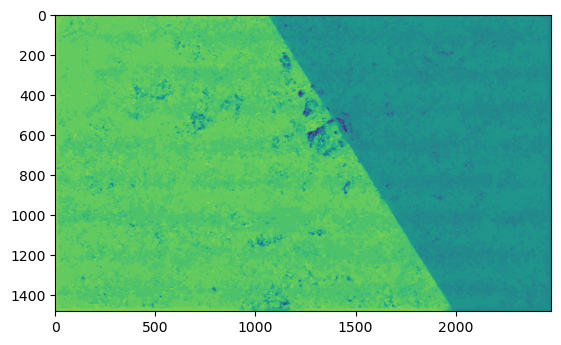

In [79]:
plt.imshow(px2)